# Import Data

In [66]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df= pd.read_csv("/application_data.csv")

# Exploring

In [ ]:
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [ ]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pd.Series(df.columns)


0                      SK_ID_CURR
1                          TARGET
2              NAME_CONTRACT_TYPE
3                     CODE_GENDER
4                    FLAG_OWN_CAR
                  ...            
117     AMT_REQ_CREDIT_BUREAU_DAY
118    AMT_REQ_CREDIT_BUREAU_WEEK
119     AMT_REQ_CREDIT_BUREAU_MON
120     AMT_REQ_CREDIT_BUREAU_QRT
121    AMT_REQ_CREDIT_BUREAU_YEAR
Length: 122, dtype: object

## Dealing with Missing Value

In [73]:
#drop columns with missing values
df = df.dropna(axis=1)

In [76]:
# drop SK_ID_CURR columns
df.drop('SK_ID_CURR', inplace=True, axis=1)

In [70]:
#drop columns related to organization & documents
df.drop(df.iloc[: ,33:54], inplace=True,axis=1) 
pd.Series(df.columns)


0                          TARGET
1              NAME_CONTRACT_TYPE
2                     CODE_GENDER
3                    FLAG_OWN_CAR
4                 FLAG_OWN_REALTY
5                    CNT_CHILDREN
6                AMT_INCOME_TOTAL
7                      AMT_CREDIT
8                NAME_INCOME_TYPE
9             NAME_EDUCATION_TYPE
10             NAME_FAMILY_STATUS
11              NAME_HOUSING_TYPE
12     REGION_POPULATION_RELATIVE
13                     DAYS_BIRTH
14                  DAYS_EMPLOYED
15              DAYS_REGISTRATION
16                DAYS_ID_PUBLISH
17                     FLAG_MOBIL
18                 FLAG_EMP_PHONE
19                FLAG_WORK_PHONE
20               FLAG_CONT_MOBILE
21                     FLAG_PHONE
22                     FLAG_EMAIL
23           REGION_RATING_CLIENT
24    REGION_RATING_CLIENT_W_CITY
25     WEEKDAY_APPR_PROCESS_START
26        HOUR_APPR_PROCESS_START
27     REG_REGION_NOT_LIVE_REGION
28     REG_REGION_NOT_WORK_REGION
29    LIVE_REG

## Basic Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


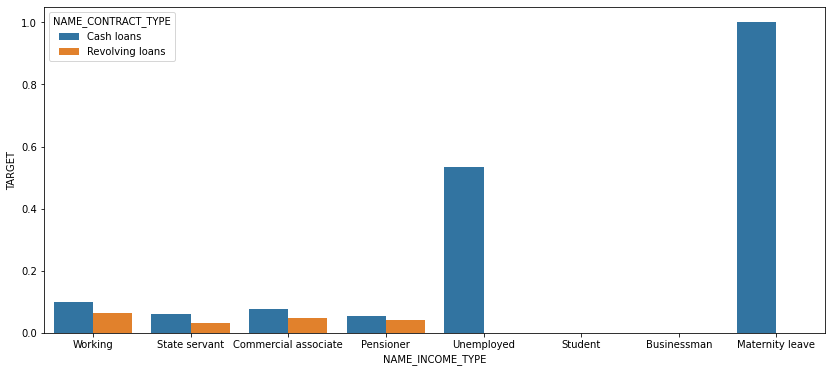

In [71]:
plt.figure(figsize=(14, 6))
sns.barplot(df.NAME_INCOME_TYPE, df.TARGET, hue=df.NAME_CONTRACT_TYPE, ci=None)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


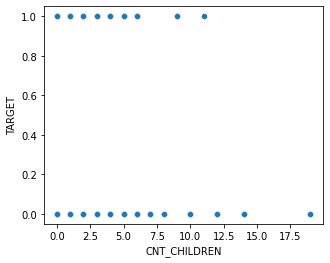

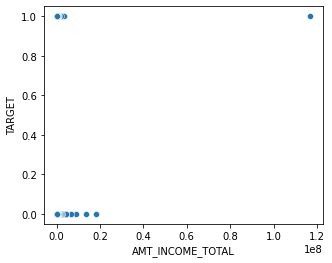

In [72]:
#creating a loop to print out the relationship between target and the following features
for index, columns in enumerate(df.columns[5:7]):
    plt.figure(figsize=(5, 4))
    sns.scatterplot(df[columns], df.TARGET )

# Preprocessing

In [ ]:
# encoding columns that does not contain float64 or int64 values
df_for_dummy = df.loc[:,(df.dtypes=='object').values]
x = []
for colname in df_for_dummy:
    x.append(colname)

df_in_dummy = pd.get_dummies(df_for_dummy, prefix=x, drop_first=False)
df_in_dummy

In [ ]:
# show columns that contain object values
rows = []
for colname in df.columns:
    if df[colname].dtypes == "object":
      rows.append([colname, df[colname].unique()])

colname_uniq_val = pd.DataFrame(rows, columns=["colname_obj", "uniq_value"])
colname_uniq_val

In [ ]:
# drop columns that contain values of object type
df.drop(colname_uniq_val['colname_obj'], axis=1, inplace=True)
# merge df without object type and df in dummy variables
df = pd.concat([df, df_in_dummy], axis=1)
df

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,...,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
0,1,0,202500.0,406597.5,0.018801,-9461,-637,-3648.0,-2120,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,270000.0,1293502.5,0.003541,-16765,-1188,-1186.0,-291,1,...,0,0,0,0,1,0,0,0,0,0
2,0,0,67500.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,135000.0,312682.5,0.008019,-19005,-3039,-9833.0,-2437,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,121500.0,513000.0,0.028663,-19932,-3038,-4311.0,-3458,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,0,157500.0,254700.0,0.032561,-9327,-236,-8456.0,-1982,1,...,0,0,1,0,0,0,0,1,0,0
307507,0,0,72000.0,269550.0,0.025164,-20775,365243,-4388.0,-4090,1,...,0,0,0,0,1,0,0,0,0,0
307508,0,0,153000.0,677664.0,0.005002,-14966,-7921,-6737.0,-5150,1,...,0,0,0,0,0,0,0,1,0,0
307509,1,0,171000.0,370107.0,0.005313,-11961,-4786,-2562.0,-931,1,...,0,0,0,0,0,0,0,0,0,1


##Download manipulated data into csv

In [ ]:
from google.colab import files
import pandas as pd
df.to_csv('df.csv')
files.download('df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Splitting Data

In [ ]:
y=df['TARGET']
X= df.loc[:, df.columns != 'TARGET']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.2, random_state= 0)
print(X_train.shape, "rows for training and", X_test.shape, "rows for testing")

(246008, 64) rows for training and (61503, 64) rows for testing


# Modeling

### Logistic Regression

In [ ]:
#fitting logistic regression
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression().fit(X_train, y_train)
y_pred=lm.predict(X_test)
#getting score
score = lm.score(X_test, y_test)
score

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9210607612636782

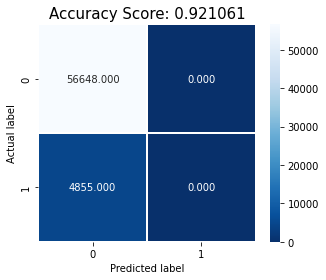

In [ ]:
#confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
score = round(score, 6)
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### Decision Tree

In [ ]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred_dt = clf.predict(X_test)

In [34]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))

Accuracy: 0.8449994309220689


In [ ]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi=300)
tree.plot_tree(clf,
               feature_names = df.columns,
               filled = True,
               fontsize=6,
               max_depth=4);

### Neural Network

In [57]:
# Neural Network
import keras
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(8, input_shape=(64,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=100)
_,accuracy_nn = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy: %.2f' % (accuracy_nn*100),"%")

Epoch 1/10
2461/2461 [==============================] - 6s 2ms/step - loss: 0.2881 - accuracy: 0.9151
Epoch 2/10
2461/2461 [==============================] - 6s 2ms/step - loss: 0.2709 - accuracy: 0.9188
Epoch 3/10
2461/2461 [==============================] - 5s 2ms/step - loss: 0.2700 - accuracy: 0.9188
Epoch 4/10
2461/2461 [==============================] - 4s 2ms/step - loss: 0.2697 - accuracy: 0.9188
Epoch 5/10
2461/2461 [==============================] - 4s 2ms/step - loss: 0.2695 - accuracy: 0.9188
Epoch 6/10
2461/2461 [==============================] - 4s 2ms/step - loss: 0.2693 - accuracy: 0.9188
Epoch 7/10
2461/2461 [==============================] - 4s 2ms/step - loss: 0.2692 - accuracy: 0.9188
Epoch 8/10
2461/2461 [==============================] - 4s 2ms/step - loss: 0.2691 - accuracy: 0.9188
Epoch 9/10
2461/2461 [==============================] - 4s 2ms/step - loss: 0.2689 - accuracy: 0.9188
Epoch 10/10
2461/2461 [==============================] - 4s 2ms/step - loss: 0.268

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

y_pred_nn = model.predict(X_test)
y_pred_nn = (y_pred_nn > 0.5)

# Plotting confusion matrix for neural network
# 1 means clients with payment difficulties/ 0 means clients without difficulties
cm_nn = metrics.confusion_matrix(y_test, y_pred_nn)
matrix = pd.DataFrame(cm_nn, 
                      ('0', '1'), 
                      ('0', '1'))
print("Confusion Matrix for Neural Network\n", matrix)

Confusion Matrix for Neural Network
        0  1
0  56648  0
1   4855  0


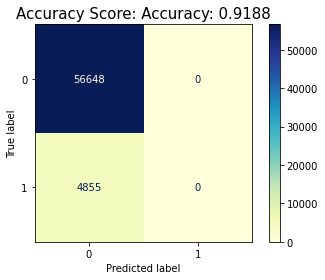

In [63]:
# Visualising confusion matrix for neural network
cm_nn_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_nn, display_labels = [0, 1])
cm_nn_display.plot(cmap = 'YlGnBu')
score_nn = 'Accuracy: %.4f' % (accuracy_nn)
all_sample_title = 'Accuracy Score: {0}'.format(score_nn)
plt.title(all_sample_title, size = 15)
plt.show()

In [ ]:
score_nn = metrics.accuracy_score(y_test,y_pred_nn).astype(float)
score_nn = round(score_nn, 6)

### Principal Component Analysis (PCA)

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [51]:
# Applying PCA function on training and testing set of X component
from sklearn.decomposition import PCA
 
pca = PCA(.88)
 
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

 
explained_variance = pca.explained_variance_ratio_

### Logistic Regression with PCA

In [54]:
# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression 
 
classifier_pca = LogisticRegression(random_state = 0)
classifier_pca.fit(X_train_pca, y_train)

# Predicting the test set result using
# predict function under LogisticRegression
y_pred_pca = classifier_pca.predict(X_test_pca)

# making confusion matrix between
# test set of Y and predicted value.
from sklearn.metrics import confusion_matrix

cm_pca = confusion_matrix(y_test, y_pred_pca)
matrix = pd.DataFrame(cm_pca, 
                      ('0', '1'), 
                      ('0', '1'))
print("Confusion Matrix for PCA\n", matrix)
score_pca = classifier_pca.score(X_test_pca, y_test)
score_pca = round(score_pca, 4)
print("Accuracy:", score_pca)

Confusion Matrix for PCA
        0  1
0  56648  0
1   4855  0
Accuracy: 0.9211


In [39]:
#Implementing the model
import statsmodels.api as sm
logit_model_pca=sm.Logit(y_train,X_train_pca)
result=logit_model_pca.fit()
print(result.summary2())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.690107
         Iterations 5
                          Results: Logit
Model:              Logit            Pseudo R-squared: -1.450     
Dependent Variable: TARGET           AIC:              339623.5461
Date:               2022-07-25 16:37 BIC:              340040.0709
No. Observations:   246008           Log-Likelihood:   -1.6977e+05
Df Model:           39               LL-Null:          -69284.    
Df Residuals:       245968           LLR p-value:      1.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     5.0000                                        
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
x1         0.0289     0.0018    16.0453   0.0000    0.0254    0.0324
x2        -0.0559     0.0024   -23.3855   0.0